# Predição de doenças cardíacas usando Inteligência Artificial
##Uma abordagem baseada em Machine Learning
####Eduardo Brandão Ferrari, Felipe Christofaro Romani, Pedro Barauna de Oliveira
####Orientador: Fabio Oliveira Teixeira

O **objetivo** deste trabalho é desenvolver um modelo preditivo para a identificação de
doenças cardíacas utilizando técnicas de machine learning, a partir de uma base de dados
pública contendo informações clínicas de 918 pacientes. A base de dados inclui variáveis
como idade, sexo, tipo de dor no peito, pressão arterial em repouso, colesterol, glicemia
em jejum, resultados do eletrocardiograma, frequência cardíaca máxima, entre outros. O
modelo será treinado para fornecer um pré-diagnóstico confiável, capaz de auxiliar na
detecção precoce de condições cardíacas. Este trabalho busca, ainda, validar o modelo
proposto em termos de acurácia e eficácia, comparando seus resultados com métodos
tradicionais de diagnóstico.

---
####Fonte de Dados

*   https://archive.ics.uci.edu/dataset/45/heart+disease
*   https://archive.ics.uci.edu/dataset/145/statlog+heart

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv(r"/content/drive/MyDrive/df_ficha_medica.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1IiyZNxXO9nKBKVW07yJq4tALLZLB2HPpDuhmQ-znwPQ#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
df = df.rename(columns={"Age": "Idade",
                   "Sex": "Sexo",
                   "ChestPainType": "Tipo de dor no peito",
                   "RestingBP": "Pressão arterial em repouso",
                   "Cholesterol": "Colesterol Ruim(LDL)",
                   "FastingBS": "Glicemia em jejum > 120mg/dl",
                   "RestingECG": "Resultados do eletrocardiograma em repouso",
                   "MaxHR": "Frequência cardíaca máxima atingida",
                   "ExerciseAngina": "Angina induzida por exercício",
                   "Oldpeak": "Insuficiência do fluxo sanguíneo para o músculo cardíaco",
                   "ST_Slope":"Padrão ECG",
                   "HeartDisease": "Tem doença cardíaca?"
                    })

In [ ]:
df.describe()

,Idade,Pressão arterial em repouso,Colesterol Ruim(LDL),Glicemia em jejum > 120mg/dl,Frequência cardíaca máxima atingida,Insuficiência do fluxo sanguíneo para o músculo cardíaco,Tem doença cardíaca?
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


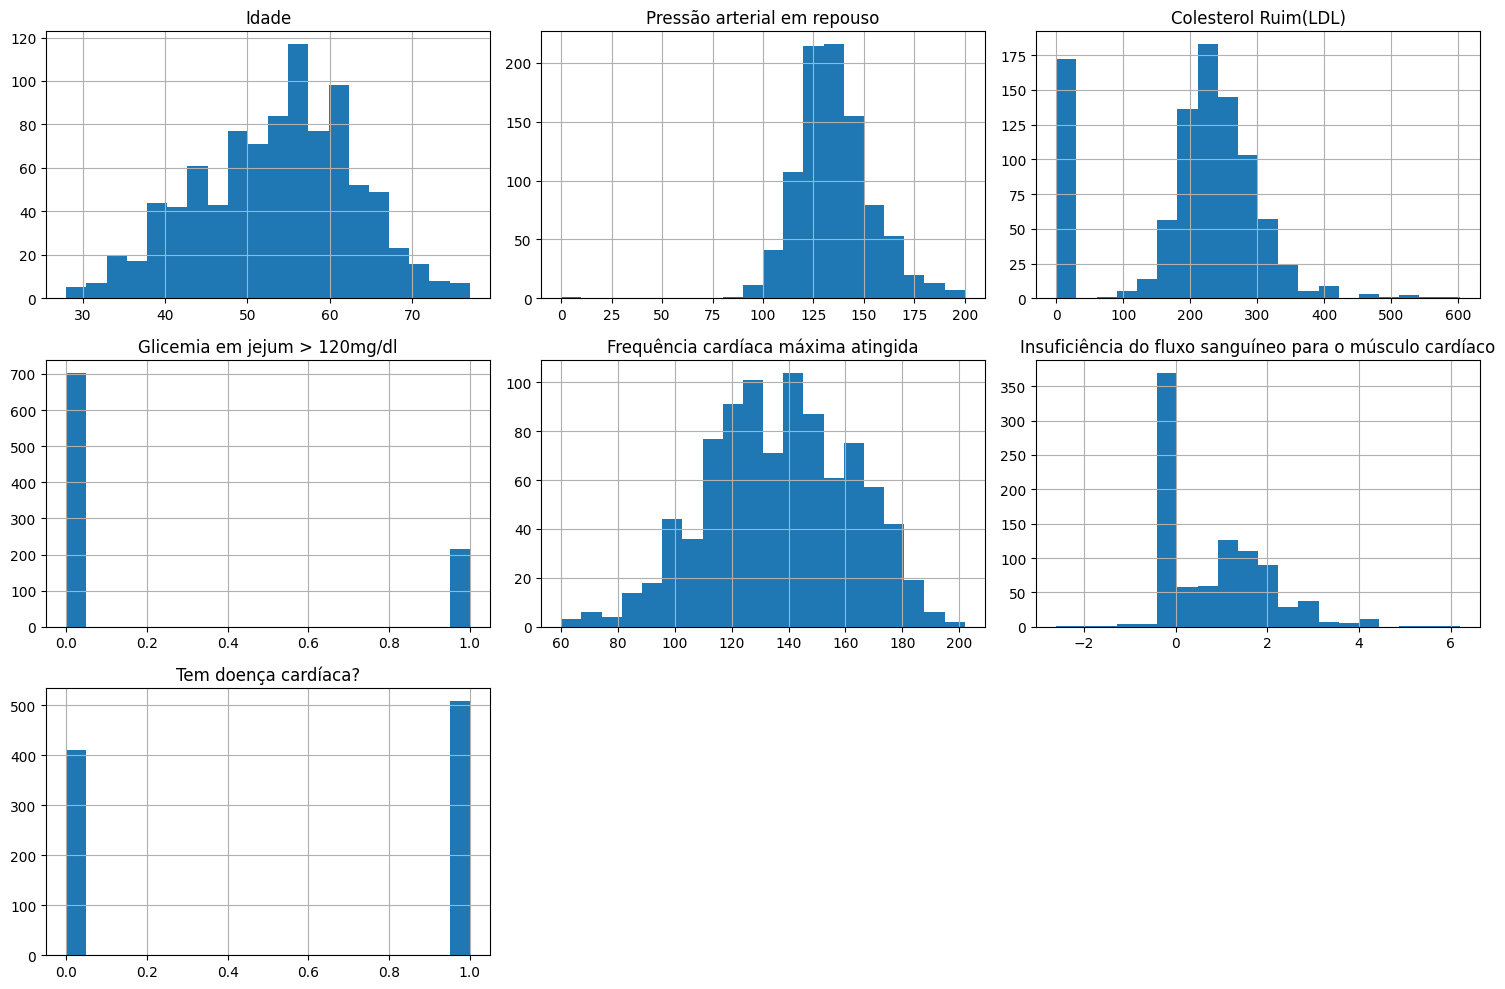

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

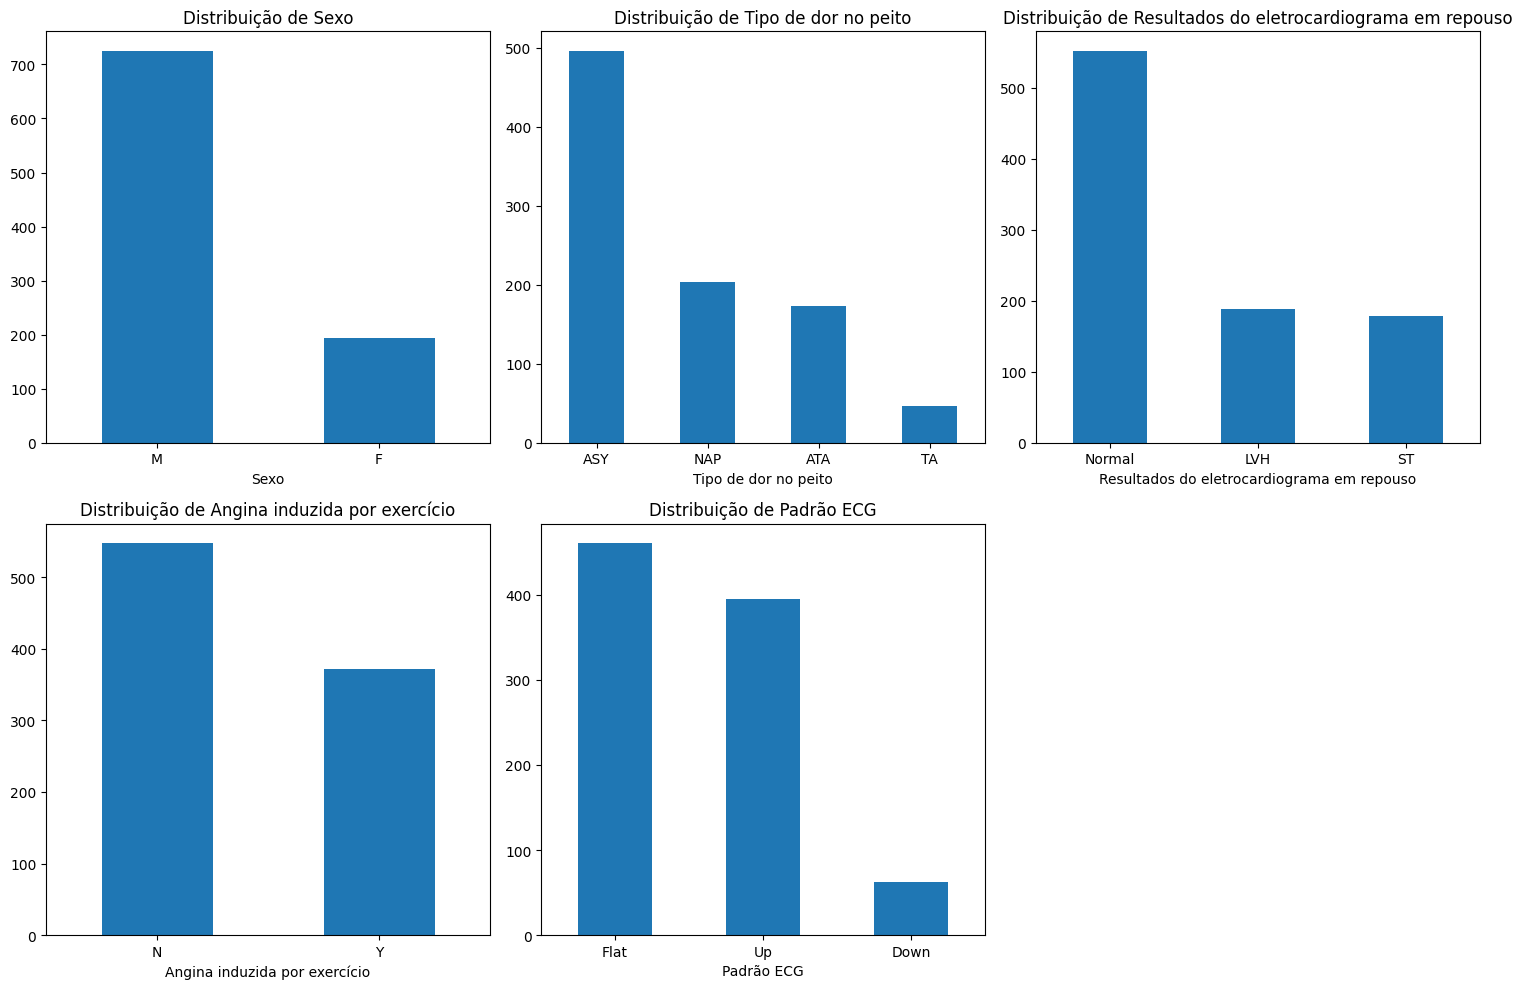

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns)//3 + 1, 3, i)
    df[column].value_counts().plot(kind='bar', title=f'Distribuição de {column}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Após checar valores, vimos que alguns não são compatíveis com o mundo real

- **Pressão Arterial em Repouso (mínimo = 0)**

  A pressão arterial em repouso não pode ser zero. Isso indicaria uma condição médica grave ou erro nos dados.
<br><br>
- **Colesterol Ruim (LDL) (mínimo = 0)**

  Níveis de LDL não podem ser iguais a zero. Mesmo com bons hábitos alimentares, o LDL geralmente não atinge esse valor.
<br><br>
### Também serão removidos outliers, que possivelmente representam erros de medição e poderão afetar o desempenho do nosso modelo
<img src="https://www.scribbr.com/wp-content/uploads/2022/01/interquartile-range.png" height="350">

https://www.scribbr.com/statistics/outliers/


In [ ]:
# Removendo dados não compatíveis
df = df[
    (df['Pressão arterial em repouso'] > 0) &
    (df['Colesterol Ruim(LDL)']  > 0)
]

In [ ]:
df.describe()

,Idade,Pressão arterial em repouso,Colesterol Ruim(LDL),Glicemia em jejum > 120mg/dl,Frequência cardíaca máxima atingida,Insuficiência do fluxo sanguíneo para o músculo cardíaco,Tem doença cardíaca?
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Removendo Outliers
def remove_outliers(ps_df):
    for col in ps_df.select_dtypes(include=['float64', 'int64']).columns:
      if col != 'Glicemia em jejum > 120mg/dl':
        Q1 = ps_df[col].quantile(0.25)
        Q3 = ps_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        ps_df = ps_df[(ps_df[col] >= lower_bound) & (ps_df[col] <= upper_bound)]

    return ps_df


df = remove_outliers(df)

df.describe()

,Idade,Pressão arterial em repouso,Colesterol Ruim(LDL),Glicemia em jejum > 120mg/dl,Frequência cardíaca máxima atingida,Insuficiência do fluxo sanguíneo para o músculo cardíaco,Tem doença cardíaca?
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,52.683526,131.420520,238.800578,0.161850,140.635838,0.829913,0.462428
std,9.564897,15.381997,47.750050,0.368579,24.487459,0.960848,0.498947
min,28.000000,92.000000,110.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,206.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,234.500000,0.000000,141.000000,0.400000,0.000000
75%,59.000000,140.000000,271.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,170.000000,369.000000,1.000000,202.000000,3.600000,1.000000


In [ ]:
porcentagens = df['Tem doença cardíaca?'].value_counts(normalize=True)
print(porcentagens)

df['Tem doença cardíaca?'].value_counts()

Tem doença cardíaca?
0    0.537572
1    0.462428
Name: proportion, dtype: float64


,count
Tem doença cardíaca?,
0,372
1,320


0 --> Sem Doença Cardíaca

1 --> Com Doença Cardíaca

### Transformando variáveis categóricas em numeros, para serem compreendidas pelo modelo ML

In [ ]:
# One Hot Encoding
df_strings = df.select_dtypes(include='object')
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_onehot = pd.get_dummies(df_strings, drop_first=True).astype(int)
df_combined = pd.concat([df_numeric, df_onehot], axis=1)

###Matriz Correlação

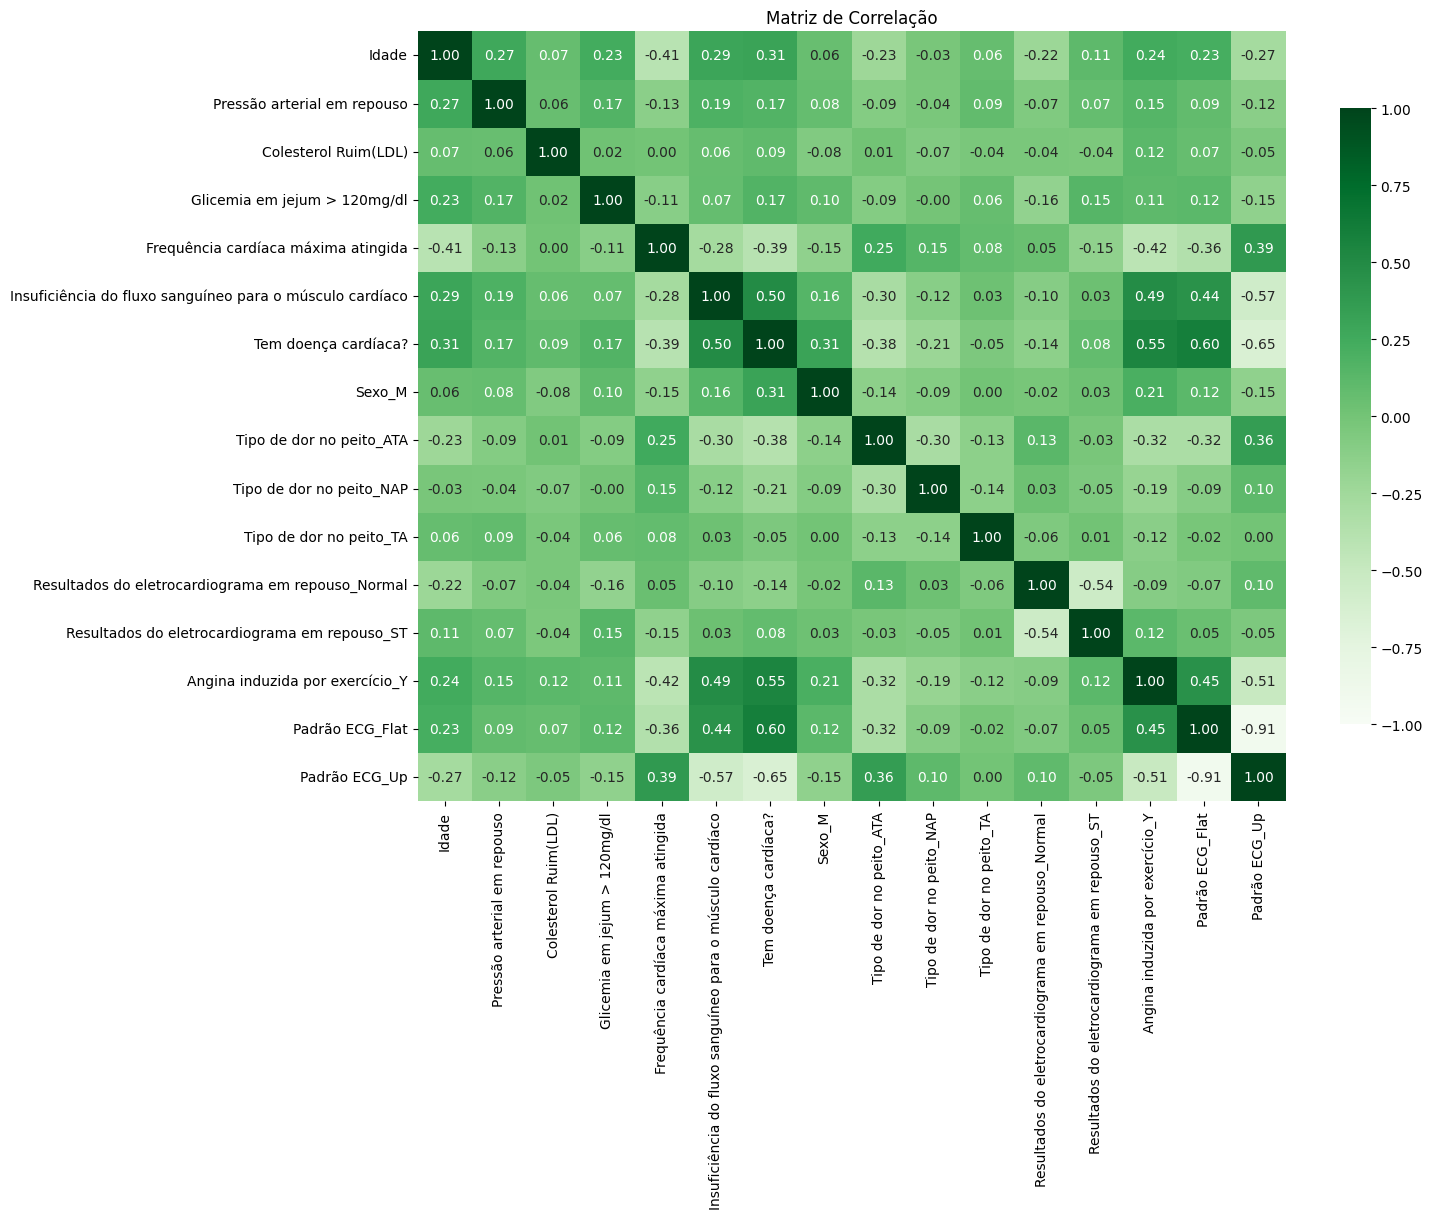

In [ ]:
corr_matrix = df_combined.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Greens',
    vmin=-1, vmax=1,
    center=0,
    fmt='.2f',
    cbar_kws={'shrink': .8}
)

plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Correlação de variáveis com o alvo
correlation_with_target = corr_matrix['Tem doença cardíaca?']
correlation_with_target.sort_values(ascending=False)

,Tem doença cardíaca?
Tem doença cardíaca?,1.000000
Padrão ECG_Flat,0.599507
Angina induzida por exercício_Y,0.549597
Insuficiência do fluxo sanguíneo para o músculo cardíaco,0.499671
Idade,0.309994
Sexo_M,0.308117
Glicemia em jejum > 120mg/dl,0.166893
Pressão arterial em repouso,0.166771
Colesterol Ruim(LDL),0.094808
Resultados do eletrocardiograma em repouso_ST,0.084259


### As previsões estão balanceadas, dados equilibrados para desenvolver o modelo de ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df_combined.drop(columns='Tem doença cardíaca?', axis=1)
Y = df_combined['Tem doença cardíaca?']

In [ ]:
X

,Idade,Pressão arterial em repouso,Colesterol Ruim(LDL),Glicemia em jejum > 120mg/dl,Frequência cardíaca máxima atingida,Insuficiência do fluxo sanguíneo para o músculo cardíaco,Sexo_M,Tipo de dor no peito_ATA,Tipo de dor no peito_NAP,Tipo de dor no peito_TA,Resultados do eletrocardiograma em repouso_Normal,Resultados do eletrocardiograma em repouso_ST,Angina induzida por exercício_Y,Padrão ECG_Flat,Padrão ECG_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


In [ ]:
Y

,Tem doença cardíaca?
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


Separando dados de treino e dados de teste

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

### Os modelos a serem treinados serão:
- **Regressão Logística**: Um modelo estatístico que usa uma função logística (ou sigmoid) para prever probabilidades em problemas de classificação binária. Ele calcula a relação entre as variáveis independentes e a probabilidade de uma classe alvo específica.

<img src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" height="250">
<br><br>

- **K-Nearest Neighbors (KNN)**: Um algoritmo baseado em instâncias que classifica novos dados comparando-os com os exemplos mais próximos no espaço de características. A classe do novo dado é determinada pela maioria dos "vizinhos" mais próximos (geralmente um número k definido).

<img src="https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png" height="250">
<br><br>

- **Árvore de Decisão**: Um modelo de aprendizado supervisionado que divide os dados em subconjuntos baseados em perguntas simples, representando as decisões como uma árvore de nós e ramos. Cada nó representa uma condição com base em uma característica, e os ramos levam a resultados ou outras condições.

<img src="https://brains.dev/wp-content/uploads/2023/04/dtree.png" height="250">
<br><br>

- **Naive Bayes**: Um classificador probabilístico baseado no teorema de Bayes, assumindo que todas as características são independentes entre si. Mesmo sendo uma suposição forte e raramente verdadeira na prática, ele funciona muito bem em problemas de classificação, especialmente com grandes volumes de dados.

<img src="https://databasecamp.de/wp-content/uploads/naive-bayes-overview-1024x709.png" height="250">
<br><br>
---

Regressão Logística

In [ ]:
model_LogisticRegression = LogisticRegression()

model_LogisticRegression.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model_LogisticRegression.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model_LogisticRegression.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8607594936708861
Accuracy on Test data :  0.8848920863309353


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [ ]:
model_GaussianNB = GaussianNB()

model_GaussianNB.fit(X_train, Y_train)

X_train_prediction = model_GaussianNB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = model_GaussianNB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8625678119349005
Accuracy on Test data :  0.8561151079136691


Árvore de Decisão

In [ ]:
model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)

model_DecisionTreeClassifier.fit(X_train, Y_train)

X_train_prediction = model_DecisionTreeClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = model_DecisionTreeClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy on Test data :  0.7553956834532374


KNN

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=8)
model_KNN.fit(X_train, Y_train)

X_train_prediction_knn = model_KNN.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)

print('Accuracy on Training data (KNN): ', training_data_accuracy_knn)

X_test_prediction_knn = model_KNN.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)

print('Accuracy on Test data (KNN): ', test_data_accuracy_knn)

Accuracy on Training data (KNN):  0.7432188065099458
Accuracy on Test data (KNN):  0.6258992805755396


Verificando com matriz de confusão

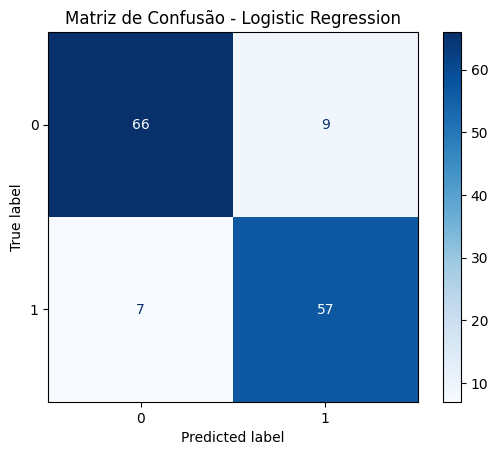

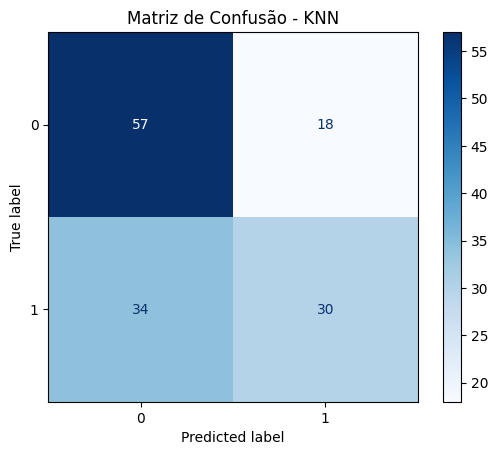

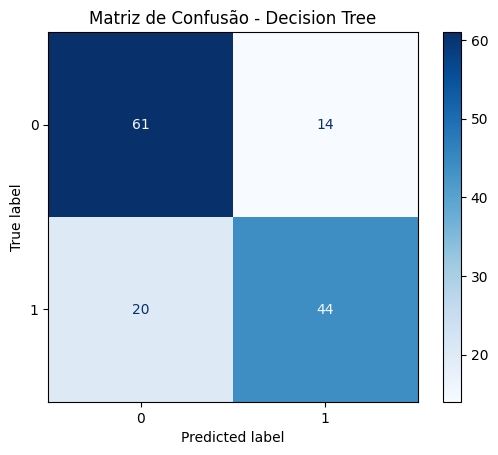

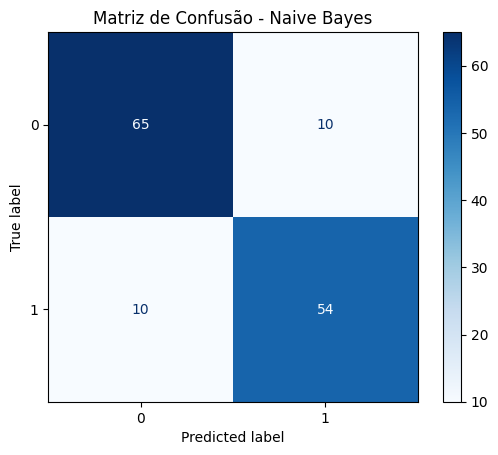

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def plot_confusion_matrix(model, X_test, Y_test, model_name):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

plot_confusion_matrix(model_LogisticRegression, X_test, Y_test, "Logistic Regression")

plot_confusion_matrix(model_KNN, X_test, Y_test, "KNN")

plot_confusion_matrix(model_DecisionTreeClassifier, X_test, Y_test, "Decision Tree")

plot_confusion_matrix(model_GaussianNB, X_test, Y_test, "Naive Bayes")


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation para Logistic Regression
cv_scores_logistic = cross_val_score(model_LogisticRegression, X_train, Y_train, cv=5)
print(f'Cross-validation accuracy (Logistic Regression): {cv_scores_logistic.mean()}')

# KNN
cv_scores_knn = cross_val_score(model_KNN, X_train, Y_train, cv=5)
print(f'Cross-validation accuracy (KNN): {cv_scores_knn.mean()}')

# Decision Tree
cv_scores_tree = cross_val_score(model_DecisionTreeClassifier, X_train, Y_train, cv=5)
print(f'Cross-validation accuracy (Decision Tree): {cv_scores_tree.mean()}')

# Naive Bayes
cv_scores_nb = cross_val_score(model_GaussianNB, X_train, Y_train, cv=5)
print(f'Cross-validation accuracy (Naive Bayes): {cv_scores_nb.mean()}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation accuracy (Logistic Regression): 0.8480917280917281
Cross-validation accuracy (KNN): 0.6781490581490581
Cross-validation accuracy (Decision Tree): 0.8011466011466013
Cross-validation accuracy (Naive Bayes): 0.8463718263718263


Analisando os resultados da validação cruzada, fica claro que tanto o modelo de Regressão Logística quanto o modelo de Naive Bayes tiveram um ótimo desempenho, com acurácias acima de 84% nesse processo mais rigoroso de avaliação.
O modelo de Regressão Logística obteve uma acurácia de 84,81% na validação cruzada, o que é um resultado muito bom e reforça sua capacidade de fazer previsões precisas sobre a presença de doenças cardíacas. Esse modelo se destaca por sua relativa simplicidade e facilidade de interpretação, o que pode ser uma vantagem importante, especialmente para um profissional iniciante como você.
Por outro lado, o modelo de Naive Bayes também apresentou um excelente desempenho na validação cruzada, com acurácia de 84,64%. Esse modelo se caracteriza por sua abordagem probabilística, que pode ser mais intuitiva para quem está começando a aprender sobre machine learning. Além disso, o Naive Bayes costuma ser mais robusto a dados incompletos ou ruidosos, o que pode ser uma característica interessante dependendo das particularidades do seu conjunto de dados.
Considerando esses resultados, ambos os modelos se mostram excelentes opções para o seu projeto de previsão de doenças cardíacas. A escolha final vai depender de fatores como a sua familiaridade com cada modelo, a necessidade de interpretabilidade dos resultados e as características específicas dos seus dados.
Não existe uma resposta definitiva sobre qual modelo é o "melhor". Ambos apresentaram ótimos resultados e você pode se beneficiar das vantagens de cada um deles. O importante é que você continue explorando, testando e aprimorando seus modelos de acordo com as necessidades do seu projeto.

Exportando Modelo

In [ ]:
import pickle


with open('model_LogisticRegression.pkl', 'wb') as file:
    pickle.dump(model_LogisticRegression, file)

with open('model_GaussianNB.pkl', 'wb') as file:
    pickle.dump(model_GaussianNB, file)

In [ ]:
from google.colab import files
files.download('model_LogisticRegression.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('model_GaussianNB.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
columns = [col for col in df_combined.columns if col != 'Tem doença cardíaca?'] + ['Tem doença cardíaca?']
df_final = df_combined[columns]
df_final.to_csv('df.csv', index=False)
files.download('df.csv')
#usar este arquivo para testes. ignorar a úttima coluna para dar input e comparar a predição

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 para importar ele em outro projeto:


In [ ]:
# import pickle

# loaded_model_LogisticRegression = pickle.load('model_LogisticRegression.pkl')
# loaded_model_GaussianNB = pickle.load('model_GaussianNB.pkl')

Sistema para testes

In [ ]:
input_data = (60,100,248,0,125,1.0,1,0,0,0,1,0,0,1,0)
# Idade,Pressão arterial em repouso,Colesterol Ruim(LDL),Glicemia em jejum > 120mg/dl,Frequência cardíaca máxima atingida,Insuficiência do fluxo sanguíneo para o músculo cardíaco,Sexo_M,Tipo de dor no peito_ATA,Tipo de dor no peito_NAP,Tipo de dor no peito_TA,Resultados do eletrocardiograma em repouso_Normal,Resultados do eletrocardiograma em repouso_ST,Angina induzida por exercício_Y,Padrão ECG_Flat,Padrão ECG_Up,
# Tem doença cardíaca?
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_LogisticRegression.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_GaussianNB.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
